In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from matplotlib import rcParams
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [3]:
df=pd.read_excel(r"C:/Users/91836/Desktop/Curriculum and courses/Semesters/sem 7/Data Analytics Laboratory/A4/car_evaluation.xlsx", thousands=',')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
df=pd.read_excel(r"C:/Users/91836/Desktop/Curriculum and courses/Semesters/sem 7/Data Analytics Laboratory/A5/car_evaluation.xlsx", thousands=',')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
df.columns=['buying', 'maintenance', 'doors', 'persons', 'lug_boot' , 'safety' , 'target']
df.head()

,buying,maintenance,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buying       1727 non-null   object
 1   maintenance  1727 non-null   object
 2   doors        1727 non-null   object
 3   persons      1727 non-null   object
 4   lug_boot     1727 non-null   object
 5   safety       1727 non-null   object
 6   target       1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
df.isnull().sum()


buying         0
maintenance    0
doors          0
persons        0
lug_boot       0
safety         0
target         0
dtype: int64

In [8]:
df['target'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: target, dtype: int64

<AxesSubplot:>

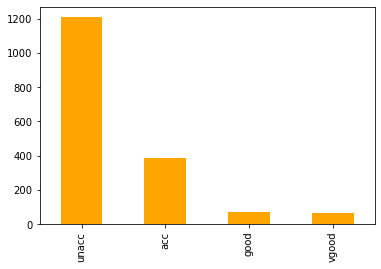

In [187]:
df['target'].value_counts().plot(kind='bar',color='orange')

In [14]:
sns.countplot(df[df['target']=='unacc'][''])
plt.show()

KeyError: ''

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buying       1727 non-null   object
 1   maintenance  1727 non-null   object
 2   doors        1727 non-null   object
 3   persons      1727 non-null   object
 4   lug_boot     1727 non-null   object
 5   safety       1727 non-null   object
 6   target       1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [18]:
X = df.drop(['target'], axis = 1)
y = df['target']

In [19]:
print(y)

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: target, Length: 1727, dtype: object


In [20]:
from sklearn.preprocessing import OrdinalEncoder     

In [21]:
buying_price_category = ['low', 'med', 'high', 'vhigh']
maint_cost_category = ['low', 'med', 'high','vhigh']
doors_category=[2,3, 4, '5more']
person_capacity_category = [2, 4, 'more']
lug_boot_category = ['small', 'med', 'big']
safety_category = ['low', 'med', 'high']
all_categories = [buying_price_category, maint_cost_category,doors_category,person_capacity_category,lug_boot_category,safety_category]


In [22]:
oe = OrdinalEncoder(categories= all_categories)

In [23]:
X = oe.fit_transform( df[['buying', 'maintenance', 'doors', 'persons', 'lug_boot', 'safety']])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2)

In [58]:
DT_classifier = DecisionTreeClassifier( criterion= 'entropy', max_depth= 1, min_samples_split= 10)
DT_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_split=10)

In [59]:
y_pred = DT_classifier.predict(X_test)

In [60]:
confusion_matrix(y_test, y_pred)

array([[  0,   0, 121,   0],
       [  0,   0,  20,   0],
       [  0,   0, 357,   0],
       [  0,   0,  21,   0]], dtype=int64)

In [61]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         acc       0.00      0.00      0.00       121
        good       0.00      0.00      0.00        20
       unacc       0.69      1.00      0.82       357
       vgood       0.00      0.00      0.00        21

    accuracy                           0.69       519
   macro avg       0.17      0.25      0.20       519
weighted avg       0.47      0.69      0.56       519



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


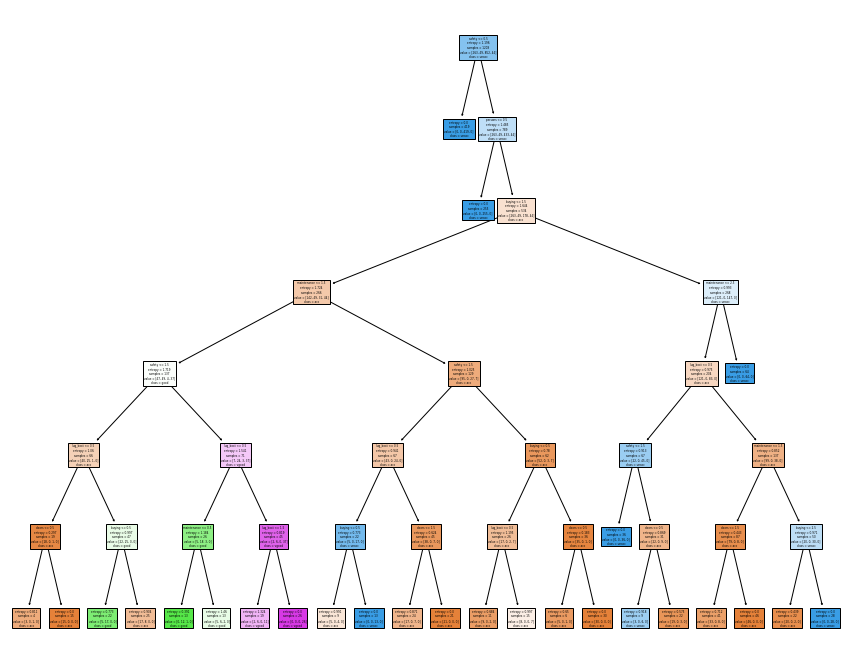

In [57]:
from sklearn import tree
fig = plt.figure(figsize=(15,12))
_ = tree.plot_tree(DT_classifier,
feature_names=df.columns[:-1],
class_names= DT_classifier.classes_, filled=True)

In [156]:
df=pd.DataFrame(df)
print(df)

     buying maintenance  doors persons lug_boot safety target
0     vhigh       vhigh      2       2    small    med  unacc
1     vhigh       vhigh      2       2    small   high  unacc
2     vhigh       vhigh      2       2      med    low  unacc
3     vhigh       vhigh      2       2      med    med  unacc
4     vhigh       vhigh      2       2      med   high  unacc
...     ...         ...    ...     ...      ...    ...    ...
1722    low         low  5more    more      med    med   good
1723    low         low  5more    more      med   high  vgood
1724    low         low  5more    more      big    low  unacc
1725    low         low  5more    more      big    med   good
1726    low         low  5more    more      big   high  vgood

[1727 rows x 7 columns]
